In [1]:
import nltk
import re
import string
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from math import radians, sin, cos, sqrt, atan2
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error, r2_score


# from evalml.objectives import get_optimization_objectives
# from evalml.problem_types import ProblemTypes

from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
import os

In [4]:
import pandas as pd

city_data_other_cities_df = pd.read_csv("D:\\UIC\\Fall 2023 Project\\other_cities.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
city_data_other_cities_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,month
0,A-883567,Source2,2,2021-09-25 09:35:18,2021-09-25 11:04:39,40.904720,-77.388947,40.903967,-77.384762,0.0,Lane blocked due to accident on PA-45 Penns Va...,Penns Valley Rd,Aaronsburg,Centre,PA,16820-9115,US,US/Eastern,KUNV,2021-09-25 09:53:00,54.0,54.0,94.0,28.73,10.0,CALM,0.0,0.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,9.0
1,A-984058,Source2,2,2021-06-30 14:53:44,2021-06-30 17:08:38,40.900051,-77.448723,40.900435,-77.447198,0.0,Lane blocked due to accident on PA-45 Aaron Sq...,E Aaron Sq,Aaronsburg,Centre,PA,16820,US,US/Eastern,KUNV,2021-06-30 14:53:00,86.0,86.0,55.0,28.64,10.0,NW,9.0,0.0,Light Rain with Thunder,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,6.0
2,A-1412077,Source2,2,2020-08-05 18:18:34,2020-08-05 21:54:51,40.904720,-77.388947,40.903967,-77.384762,0.0,Lane blocked due to accident on PA-45 Penns Va...,Penns Valley Rd,Aaronsburg,Centre,PA,16820-9115,US,US/Eastern,KUNV,2020-08-05 17:53:00,81.0,81.0,34.0,28.71,10.0,W,9.0,0.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,8.0
3,A-2400434,Source2,2,2018-12-17 07:50:05,2018-12-17 08:19:12,40.883820,-77.467682,40.900435,-77.447198,0.0,Lane blocked due to accident on Coburn Rd both...,Tattletown Rd,Aaronsburg,Centre,PA,16820,US,US/Eastern,KUNV,2018-12-17 06:53:00,35.6,29.2,87.0,29.84,7.0,WSW,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,12.0
4,A-2805932,Source2,2,2018-05-06 19:08:26,2018-05-06 19:38:12,40.905312,-77.421593,NaN,NaN,0.0,Accident on PA-45 Penns Valley Rd both ways at...,Bower Hollow Rd,Aaronsburg,Centre,PA,16820-9202,US,US/Eastern,KUNV,2018-05-06 18:53:00,51.8,NaN,94.0,29.93,7.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,5.0


In [5]:
df = city_data_other_cities_df
df = df.drop(columns=["End_Lat", "End_Lng"], axis=1)
rowtotal_before_eda = []
rowtotal_after_eda = []
df_array = []
rowtotal_before_eda.append(df.shape[0])
df = df.dropna()
df_array.append(df)
rowtotal_after_eda.append(df.shape[0])
print("Before drop: ", sum(rowtotal_before_eda))
print("After drop: ", sum(rowtotal_after_eda))

Before drop:  4360979
After drop:  3804257


In [6]:
df_array[0].columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'month'],
      dtype='object')

In [7]:
final_df = pd.concat(df_array, axis=0, ignore_index=True)

In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3804257 entries, 0 to 3804256
Data columns (total 42 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Source             object 
 2   Severity           int64  
 3   Start_Time         object 
 4   End_Time           object 
 5   Start_Lat          float64
 6   Start_Lng          float64
 7   Distance(mi)       float64
 8   Description        object 
 9   Street             object 
 10  City               object 
 11  County             object 
 12  State              object 
 13  Zipcode            object 
 14  Country            object 
 15  Timezone           object 
 16  Airport_Code       object 
 17  Weather_Timestamp  object 
 18  Temperature(F)     float64
 19  Wind_Chill(F)      float64
 20  Humidity(%)        float64
 21  Pressure(in)       float64
 22  Visibility(mi)     float64
 23  Wind_Direction     object 
 24  Wind_Speed(mph)    float64
 25  Precipitation(in) 

In [12]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,3804257.0,2.225014,0.506514,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,3804257.0,37.457338,4.740491,24.554800,34.023251,38.014833,40.855207,49.002201
Start_Lng,3804257.0,-94.867956,18.780233,-124.548074,-117.895221,-86.614227,-78.659809,-67.484130
Distance(mi),3804257.0,0.741720,2.172134,0.000000,0.000000,0.075000,0.673000,441.750000
Temperature(F),3804257.0,59.093779,19.317180,-89.000000,46.000000,61.000000,73.900000,207.000000
Wind_Chill(F),3804257.0,57.176573,21.577377,-89.000000,42.200000,61.000000,73.454545,207.000000
Humidity(%),3804257.0,65.652675,23.111444,1.000000,49.000000,68.000000,86.000000,100.000000
Pressure(in),3804257.0,29.408289,1.180389,0.000000,29.260000,29.800000,30.010000,58.630000
Visibility(mi),3804257.0,8.961022,2.810558,0.000000,10.000000,10.000000,10.000000,140.000000
Wind_Speed(mph),3804257.0,7.423172,5.427365,0.000000,3.500000,7.000000,10.000000,1087.000000


In [17]:
df_withyear = final_df.copy()
formats = ['%Y-%m-%d %H:%M:%S', '%Y-%m-%d %H:%M:%S.%f']
df_withyear['Start_Time'] = pd.to_datetime(df_withyear['Start_Time'], format="mixed", errors = 'coerce' )
df_withyear['Year'] = df_withyear['Start_Time'].dt.year

In [ ]:
df_withyear["Year"].unique().dtype
df_withyear.head()

dtype('int32')

## Frequency of accidents by Month and Year(Feb 2016 - Mar 2023)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


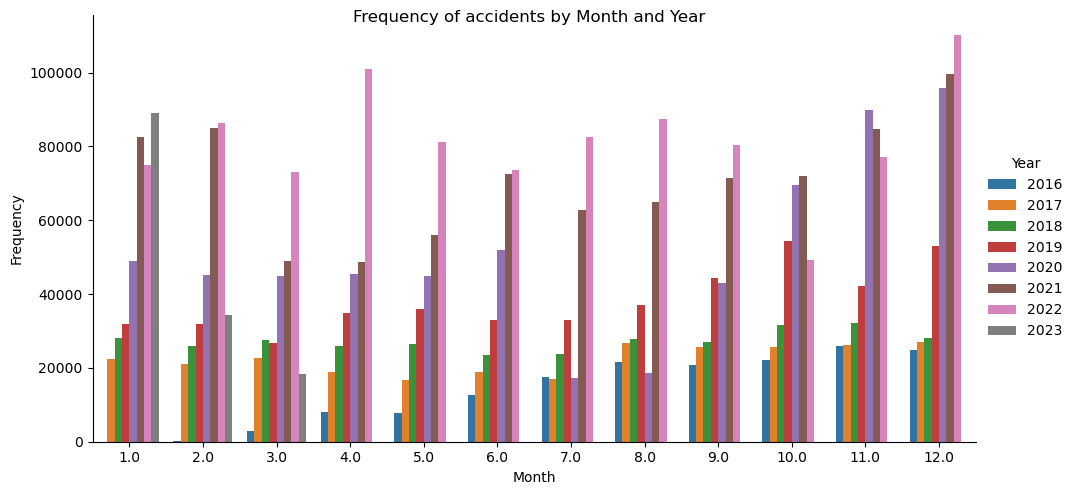

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


df_withyear['Year'] = pd.Categorical(df_withyear['Year'])
# Create a catplot
sns.catplot(x='month', kind='count', hue='Year', data=df_withyear, aspect =2)

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.suptitle('Frequency of accidents by Month and Year')

# Show the plot
plt.show()

## Top 20 US states with Highest Occurrence of Road Accidents

In [3]:
original_df = pd.read_csv("D:\\UIC\\Fall 2023 Project\\US_Accidents\\US_Accidents_March23.csv")
group_by_state_df = original_df.groupby("State").size()
group_by_state_sorted = group_by_state_df.sort_values(ascending=False)
top_20_accidents = group_by_state_sorted.head(20)


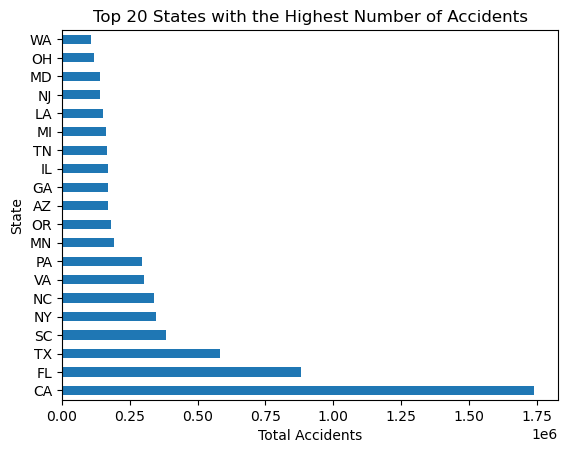

In [4]:
top_20_accidents.plot(kind="barh")
plt.xlabel("Total Accidents")  # Add x-axis label
plt.title("Top 20 States with the Highest Number of Accidents")
plt.ylabel("State")
plt.show()

## Random Forest Classifier

In [20]:
sampled_df = final_df.sample(frac=0.1, random_state=42)
sampled_df.dropna(inplace=True)
categorical_cols = sampled_df.select_dtypes(include=['object','bool','category']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    sampled_df[col] = label_encoder.fit_transform(sampled_df[col])
    
X = sampled_df.drop('Severity', axis=1)
y= sampled_df['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# print(classification_task(rf_classifier,X_train, y_train ,X_test,y_test, y_pred,'rf'))
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Accuracy: {accuracy*100:.2f}%")

Random Forest Classifier Accuracy: 92.28%


## Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


sampled_df = final_df.sample(frac=0.1, random_state=42)
sampled_df.dropna(inplace=True)

categorical_cols = sampled_df.select_dtypes(include=['object', 'bool', 'category']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    sampled_df[col] = label_encoder.fit_transform(sampled_df[col])

X = sampled_df.drop('Severity', axis=1)
y = sampled_df['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Create and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier Accuracy: {accuracy*100:.2f}%", )

Decision Tree Classifier Accuracy: 89.65%


## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression


# Assuming 'final_df' is your DataFrame and 'Severity' is the target variable
sampled_df = final_df.sample(frac=0.1, random_state=42)
sampled_df.dropna(inplace=True)

categorical_cols = sampled_df.select_dtypes(include=['object', 'bool', 'category']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    sampled_df[col] = label_encoder.fit_transform(sampled_df[col])

X = sampled_df.drop('Severity', axis=1)
y = sampled_df['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Create and train the Logistic Regression model with increased max_iter
logreg_classifier = LogisticRegression(max_iter=100000)  # Adjust the value as needed
logreg_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_classifier.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Classifier Accuracy: {accuracy*100:.2f}%")

Logistic Regression Classifier Accuracy: 80.23%


## Support Vector Machine

In [26]:
from sklearn.svm import SVC


# Assuming 'final_df' is your DataFrame and 'Severity' is the target variable
sampled_df = final_df.sample(frac=0.1, random_state=42)
sampled_df.dropna(inplace=True)

categorical_cols = sampled_df.select_dtypes(include=['object', 'bool', 'category']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    sampled_df[col] = label_encoder.fit_transform(sampled_df[col])

X = sampled_df.drop('Severity', axis=1)
y = sampled_df['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Create and train the SVM model
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Calculate and print accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Classifier Accuracy: {accuracy_svm*100:.2f}%")

SVM Classifier Accuracy: 81.21%


## Gradient Boosting

In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming 'final_df' is your DataFrame and 'Severity' is the target variable
sampled_df = final_df.sample(frac=0.1, random_state=42)
sampled_df.dropna(inplace=True)

categorical_cols = sampled_df.select_dtypes(include=['object', 'bool', 'category']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    sampled_df[col] = label_encoder.fit_transform(sampled_df[col])

# Convert the target variable 'Severity' to start from 0
label_encoder_y = LabelEncoder()
sampled_df['Severity'] = label_encoder_y.fit_transform(sampled_df['Severity'])

X = sampled_df.drop('Severity', axis=1)
y = sampled_df['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Create and train the XGBoost model
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate and print accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb*100:.2f}%")

XGBoost Classifier Accuracy: 92.67%


## Multi Layer Perceptron

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming 'final_df' is your DataFrame and 'Severity' is the target variable
sampled_df = final_df.sample(frac=0.1, random_state=42)
sampled_df.dropna(inplace=True)

categorical_cols = sampled_df.select_dtypes(include=['object', 'bool', 'category']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    sampled_df[col] = label_encoder.fit_transform(sampled_df[col])

X = sampled_df.drop('Severity', axis=1)
y = sampled_df['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Create and train the MLP (Multi-layer Perceptron) model
mlp_classifier = MLPClassifier(max_iter=1000)  # Adjust max_iter as needed
mlp_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp_classifier.predict(X_test)

# Calculate and print accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Classifier Accuracy: {accuracy_mlp*100:.2f}%")

MLP Classifier Accuracy: 76.40%


## Parameter Checks

In [30]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Assuming 'final_df' is your DataFrame and 'Severity' is the target variable
sampled_df = final_df.sample(frac=0.1, random_state=42)
sampled_df.dropna(inplace=True)

categorical_cols = sampled_df.select_dtypes(include=['object', 'bool', 'category']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    sampled_df[col] = label_encoder.fit_transform(sampled_df[col])

# Convert the target variable 'Severity' to start from 0
label_encoder_y = LabelEncoder()
sampled_df['Severity'] = label_encoder_y.fit_transform(sampled_df['Severity'])

X = sampled_df.drop('Severity', axis=1)
y = sampled_df['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=100000),
    "Gradient Boosting": GradientBoostingClassifier(),
    "MLP": MLPClassifier(max_iter=1000),
}

# Train and evaluate each model
for name, model in models.items():
    # Use scaled data for models
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(cm)
    print("\n")
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"{name} Cross-Validation Scores: {np.mean(cv_scores):.2f} (mean) +/- {np.std(cv_scores):.2f} (std)\n")

Random Forest Metrics:
Accuracy: 92.25%
Precision: 0.92
Recall: 0.92
F1 Score: 0.92
Confusion Matrix:
[[  511   337    37     0]
 [  113 88137  2124   164]
 [   13  3910 15031     4]
 [    2  1877   269  1599]]


Random Forest Cross-Validation Scores: 0.92 (mean) +/- 0.00 (std)

Decision Tree Metrics:
Accuracy: 89.63%
Precision: 0.90
Recall: 0.90
F1 Score: 0.90
Confusion Matrix:
[[  559   244    69    13]
 [  257 84548  3978  1755]
 [   63  3618 15085   192]
 [    1  1447   200  2099]]


Decision Tree Cross-Validation Scores: 0.89 (mean) +/- 0.00 (std)

SVM Metrics:
Accuracy: 85.56%
Precision: 0.85
Recall: 0.86
F1 Score: 0.84
Confusion Matrix:
[[  248   606    31     0]
 [   67 85545  4915    11]
 [   13  7132 11806     7]
 [    1  3435   266    45]]


SVM Cross-Validation Scores: 0.85 (mean) +/- 0.00 (std)

Logistic Regression Metrics:
Accuracy: 81.66%
Precision: 0.79
Recall: 0.82
F1 Score: 0.79
Confusion Matrix:
[[   11   834    40     0]
 [   31 85263  5219    25]
 [    1 11055  789